# Data Mining CS 619, Spring 2018 - Eleonora Renz

### Week 10 - Chapter 9

## Authorship Attribution

#### Getting the data

In [1]:
import os
import sys

data_folder = os.path.join(os.path.expanduser("~"), "Desktop", "DataMining_Spring2018", "Data", "Books")

In [2]:
def clean_book(document):
    lines = document.split("\n")
    start= 0
    end = len(lines)
    for i in range(len(lines)):
        line = lines[i]
        if line.startswith("*** START OF THIS PROJECT GUTENBERG"):
            start = i + 1
        elif line.startswith("*** END OF THIS PROJECT GUTENBERG"):
            end = i - 1
    return "\n".join(lines[start:end])

In [3]:
import numpy as np

def load_books_data(folder=data_folder):
    documents = []
    authors = []
    subfolders = [subfolder for subfolder in os.listdir(folder)
                  if os.path.isdir(os.path.join(folder, subfolder))]
    for author_number, subfolder in enumerate(subfolders):
        full_subfolder_path = os.path.join(folder, subfolder)
        for document_name in os.listdir(full_subfolder_path):
            with open(os.path.join(full_subfolder_path, document_name)) as inf:
                documents.append(clean_book(inf.read()))
                authors.append(author_number)
    return documents, np.array(authors, dtype='int')

In [4]:
documents, classes = load_books_data(data_folder)

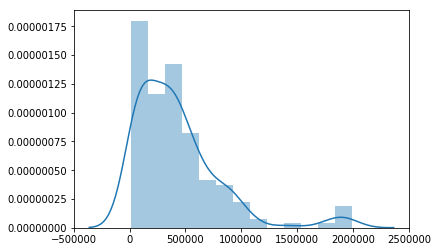

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

documents_lengths = [len(document) for document in documents]

import seaborn as sns
sns.distplot(documents_lengths)

#### Counting function words

In [6]:
function_words = ["a", "able", "aboard", "about", "above", "absent",
                  "according" , "accordingly", "across", "after", "against",
                  "ahead", "albeit", "all", "along", "alongside", "although",
                  "am", "amid", "amidst", "among", "amongst", "amount", "an",
                    "and", "another", "anti", "any", "anybody", "anyone",
                    "anything", "are", "around", "as", "aside", "astraddle",
                    "astride", "at", "away", "bar", "barring", "be", "because",
                    "been", "before", "behind", "being", "below", "beneath",
                    "beside", "besides", "better", "between", "beyond", "bit",
                    "both", "but", "by", "can", "certain", "circa", "close",
                    "concerning", "consequently", "considering", "could",
                    "couple", "dare", "deal", "despite", "down", "due", "during",
                    "each", "eight", "eighth", "either", "enough", "every",
                    "everybody", "everyone", "everything", "except", "excepting",
                    "excluding", "failing", "few", "fewer", "fifth", "first",
                    "five", "following", "for", "four", "fourth", "from", "front",
                    "given", "good", "great", "had", "half", "have", "he",
                    "heaps", "hence", "her", "hers", "herself", "him", "himself",
                    "his", "however", "i", "if", "in", "including", "inside",
                    "instead", "into", "is", "it", "its", "itself", "keeping",
                    "lack", "less", "like", "little", "loads", "lots", "majority",
                    "many", "masses", "may", "me", "might", "mine", "minority",
                    "minus", "more", "most", "much", "must", "my", "myself",
                    "near", "need", "neither", "nevertheless", "next", "nine",
                    "ninth", "no", "nobody", "none", "nor", "nothing",
                    "notwithstanding", "number", "numbers", "of", "off", "on",
                    "once", "one", "onto", "opposite", "or", "other", "ought",
                    "our", "ours", "ourselves", "out", "outside", "over", "part",
                    "past", "pending", "per", "pertaining", "place", "plenty",
                    "plethora", "plus", "quantities", "quantity", "quarter",
                    "regarding", "remainder", "respecting", "rest", "round",
                    "save", "saving", "second", "seven", "seventh", "several",
                    "shall", "she", "should", "similar", "since", "six", "sixth",
                    "so", "some", "somebody", "someone", "something", "spite",
                    "such", "ten", "tenth", "than", "thanks", "that", "the",
                    "their", "theirs", "them", "themselves", "then", "thence",
                  "therefore", "these", "they", "third", "this", "those",
"though", "three", "through", "throughout", "thru", "thus",
"till", "time", "to", "tons", "top", "toward", "towards",
"two", "under", "underneath", "unless", "unlike", "until",
"unto", "up", "upon", "us", "used", "various", "versus",
"via", "view", "wanting", "was", "we", "were", "what",
"whatever", "when", "whenever", "where", "whereas",
"wherever", "whether", "which", "whichever", "while",
                  "whilst", "who", "whoever", "whole", "whom", "whomever",
"whose", "will", "with", "within", "without", "would", "yet",
"you", "your", "yours", "yourself", "yourselves"]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

extractor = CountVectorizer(vocabulary=function_words)

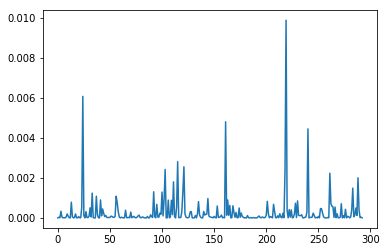

In [8]:
extractor.fit(documents)
counts = extractor.transform(documents)

normalized_counts = counts.T / np.array(documents_lengths)

averaged_counts = normalized_counts.mean(axis=1)

from matplotlib import pyplot as plt
plt.plot(averaged_counts)

#### Classifying with function words

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import grid_search

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = SVC()
grid = grid_search.GridSearchCV(svr, parameters)

pipeline1 = Pipeline([('feature_extraction', extractor),
                      ('clf', grid)
                     ])

C:\Users\Ellomarshmallow\MeineProgramme\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Ellomarshmallow\MeineProgramme\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [10]:
pipeline = Pipeline([('feature_extraction', CountVectorizer(analyzer='char', ngram_range=(3, 3))),
                     ('classifier', grid)
                    ])

scores = cross_val_score(pipeline1, documents, classes, scoring='f1_macro')
print("Score: {:.3f}".format(np.mean(scores)))

Score: 0.734


#### Accessing the Enron dataset - creating a datset loader

In [11]:
enron_data_folder = os.path.join(os.path.expanduser("~"), "Desktop", "DataMining_Spring2018", "Data", "maildir")

In [12]:
from email.parser import Parser
p = Parser()

In [13]:
from sklearn.utils import check_random_state

def get_enron_corpus(num_authors=10, data_folder=enron_data_folder,
                     min_docs_author=10, max_docs_author=100,
                     random_state=None):
    random_state = check_random_state(random_state)
    email_addresses = sorted(os.listdir(data_folder))
    random_state.shuffle(email_addresses)
    documents = []
    classes = []
    author_num = 0
    authors = {}
    for user in email_addresses:
        users_email_folder = os.path.join(data_folder, user)
        mail_folders = [os.path.join(users_email_folder, subfolder)
                        for subfolder in os.listdir(users_email_folder)
                        if "sent" in subfolder]
        try:
            authored_emails = [open(os.path.join(mail_folder, email_filename), encoding='cp1252').read()
                               for mail_folder in mail_folders
                               for email_filename in os.listdir(mail_folder)]
        except IsADirectoryError:
            continue
        if len(authored_emails) < min_docs_author:
            continue
        if len(authored_emails) > max_docs_author:
            authored_emails = authored_emails[:max_docs_author]
        contents = [p.parsestr(email)._payload for email in authored_emails]
        documents.extend(contents)
        classes.extend([author_num] * len(authored_emails))
        authors[user] = author_num
        author_num += 1
        if author_num >= num_authors or author_num >= len(email_addresses):
            break
    return documents, np.array(classes), authors

In [14]:
documents, classes, authors = get_enron_corpus(data_folder=enron_data_folder, random_state=14)

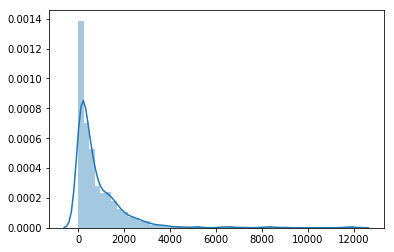

In [15]:
import seaborn as sns

document_lengths = [len(document) for document in documents]
sns.distplot(document_lengths)

#### Putting it all together

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline 

scores = cross_val_score(pipeline, documents, classes, scoring='f1_macro')
print("Score: {:.3f}".format(np.mean(scores)))

Score: 0.599


#### Evaluation

In [ ]:
from sklearn.cross_validation import train_test_split 

training_documents, testing_documents, y_train, y_test = train_test_split(documents, classes, random_state=14)

pipeline.fit(training_documents, y_train)
y_pred = pipeline.predict(testing_documents)

print(pipeline.named_steps['classifier'].best_params_)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm = cm / cm.astype(np.float).sum(axis=1)
sorted_authors = sorted(authors.keys(), key=lambda x:authors[x])

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
tick_marks = np.arange(len(sorted_authors))
plt.xticks(tick_marks, sorted_authors)
plt.yticks(tick_marks, sorted_authors)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()